<a href="https://colab.research.google.com/github/SagarSharma1702/Animal-Classification/blob/main/Copy_of_animal_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification of 10 categories of Animal images**
The Dataset has been taken from [Animal10](https://www.kaggle.com/alessiocorrado99/animals10). It contains about 28K medium quality animal images belonging to 10 categories. All the images in data set were collected from "google images" and have been checked by human. There is some erroneous data to simulate real conditions.

> 1. <a href='#step1'>Loading and Exploring Data</a>
     *  1.1.  <a href='#step1.1'>Loading Libraries</a>  
     *  1.2.  <a href='#step1.2'>Extracting Train Data</a> 
     *  1.3.  <a href='#step1.3'>Shuffling input and target for optimum training</a>    
>2. <a href='#step2'>Image Preprocessing</a>
     *  2.1. <a href='#step2.1'>Function for Resizing and Reshaping the input images </a>     
     *  2.2. <a href='#step2.2'>Image Resizing and converting them to array</a>
     *  2.3  <a href='#step2.3'>Viewing Images after preprocessing</a>
     * 2.4.  <a href='#step2.4'>Re-Shuffling processed data and converting to array</a>
     * 2.5.  <a href='#step2.5'>Train test split,OneHotVectorizing categories, Input normalization</a>              
     * 2.6.  <a href='#step2.6'>Renaming Animals</a>
     * 2.7.  <a href='#step2.7'>Data Augmentation for training</a>
     * 2.8.  <a href='#step2.8'>Preprocessing Test data</a>
     
> 3. <a href='#step3.1'>Creating CNN Models with Transfer Learning </a>
     * 3.1 <a href='#step3.1'>CNN using VGG-16 Model </a>
     * 3.2 <a href='#step3.2'>CNN using ResNet50 Model</a>
     * 3.5 <a href='#step3.3'>Training Models </a>
     * 3.6 <a href='#step3.4'>Plotting Loss and Accuracy Curves</a> 
> 4. <a href='#step4'>Predicting Categories for Test data</a>
     * 4.1 <a href='#step4.1'>Viewing Predictions</a>


<a id='step1.1'></a>

Explanation for Libraries :
* > OpenCV(cv2) function for reading image. CV2 reads order of colors as BGR. In PIL, colors order is assumed as RGB .
* > TQDM is a progress bar library. Inserting tqdm (or python -m tqdm)between pipes will pass through all stdin to stdout while printing progress to stderr
* > In Utils module, "class_weight" parameter penalizes mistakes in samples of class[i] and  "Shuffle" parameter for shuffling arrays or sparse matrices in a consistent way 
* > "categorical" parameter is used to convert array of labeled data to one-hot vector and "applications" can be used for prediction, feature extraction
* >  "Dropout" is used to prevent a model from overfitting. "Flatten" is used to preserve weight ordering when switching from one data format to another data format. Dense layer is the regular deeply connected neural network layer

<a id='step1.1'></a>
1.2.  Loading libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2

from tqdm import tqdm_notebook as tqdm
from sklearn.utils import class_weight, shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,accuracy_score
from keras.utils import to_categorical
from keras import applications, optimizers

from keras.models import Sequential, Model, load_model,clone_model
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D 
from keras.losses import categorical_crossentropy

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras import applications
from keras.applications.resnet import ResNet50
from keras.layers import BatchNormalization
from keras.layers import Dropout

<a id='step1.2'></a>
1.2.  Extracting Train Data

In [52]:
foldernames = os.listdir("/content/animals10/raw-img")
categories = []      # list of all categories of animals present
files = []           # list of all images from all categories

for k, folder in enumerate(foldernames):
    filenames = os.listdir("/content/animals10/raw-img/" + folder);
    for file in filenames:
        files.append("/content/animals10/raw-img/" + folder + "/" + file)
        categories.append(k)
# creating a dataframe of images and their respective categories        
df = pd.DataFrame({
    'filename': files,
    'category': categories
})

#initializing empty train df
train_df = pd.DataFrame(columns=['filename', 'category'])

#collecting 500 samples from each of 10 categories
i = 0
for i in range(10):
    train_df = train_df.append(df[df.category == i].iloc[:500,:])

print(train_df.head())
train_df = train_df.reset_index(drop=True) # reset index of a Data Frame
train_df

                                            filename category
0  /content/animals10/raw-img/mucca/OIP-hWv3vFImH...        0
1  /content/animals10/raw-img/mucca/OIP-dByyKHXUU...        0
2  /content/animals10/raw-img/mucca/OIP-Y-jVYYnGQ...        0
3  /content/animals10/raw-img/mucca/OIP-CvZ7pLveU...        0
4  /content/animals10/raw-img/mucca/OIP-3o6z8oVY-...        0


<ipython-input-52-759b7ed49aa4>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(df[df.category == i].iloc[:500,:])
<ipython-input-52-759b7ed49aa4>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(df[df.category == i].iloc[:500,:])
<ipython-input-52-759b7ed49aa4>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(df[df.category == i].iloc[:500,:])
<ipython-input-52-759b7ed49aa4>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(df[df.category == i].iloc[:500,:])
<ipython-input-52-759b7ed49aa4>:22: FutureWarning: The frame.append 

,filename,category
0,/content/animals10/raw-img/mucca/OIP-hWv3vFImH...,0
1,/content/animals10/raw-img/mucca/OIP-dByyKHXUU...,0
2,/content/animals10/raw-img/mucca/OIP-Y-jVYYnGQ...,0
3,/content/animals10/raw-img/mucca/OIP-CvZ7pLveU...,0
4,/content/animals10/raw-img/mucca/OIP-3o6z8oVY-...,0
...,...,...
4995,/content/animals10/raw-img/gallina/OIP-jvqhbRz...,9
4996,/content/animals10/raw-img/gallina/OIP-Ixw02gR...,9
4997,/content/animals10/raw-img/gallina/492.jpeg,9
4998,/content/animals10/raw-img/gallina/OIP-ipmrdC3...,9


<a id='step1.3'></a>
1.3. Shuffling input and target for optimum training

In [53]:
y = train_df['category']
x = train_df['filename']

x, y = shuffle(x, y, random_state=8)

<a id='step2'></a>
<a id='step2.1'></a>
* 2.1. Function for Resizing and Reshaping the input images

In [54]:
def centering_image(img):
    size = [256,256]
    
#shape:(h×w×t)taking the first2 elements(h,w) and unpacking them appropriately 
    img_size = img.shape[:2]
    
    # extracting the excess space for centering.
    row = (size[1] - img_size[0]) // 2
    col = (size[0] - img_size[1]) // 2
    
#creating centered image by taking a 0-matrix and then re-assigning intensities
    resized = np.zeros(list(size) + [img.shape[2]], dtype=np.uint8)
    resized[row:(row + img.shape[0]), col:(col + img.shape[1])] = img 

    return resized


<a id='step2.2'></a>
2.2. Image Resizing and converting them to array

In [56]:
images = []

with tqdm(total=len(train_df)) as k:  
    for i, file_path in enumerate(train_df.filename.values):
        
        #color order is changed
        img = cv2.imread(file_path)
        #resnet docs
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

        #converting images to square
        if(img.shape[0] > img.shape[1]):
            tile_size = (int(img.shape[1]*256/img.shape[0]),256)
        else:
            tile_size = (256, int(img.shape[0]*256/img.shape[1]))

        #centering the images
        img = centering_image(cv2.resize(img, dsize=tile_size))

        #output 224*224px 
        img = img[16:240, 16:240]
        images.append(img)
        k.update(1)

images = np.array(images)

<ipython-input-56-e17764e2943a>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  with tqdm(total=len(train_df)) as k:


  0%|          | 0/5000 [00:00<?, ?it/s]

<a id='step2.3'></a>
2.3. Viewing Images after preprocessing

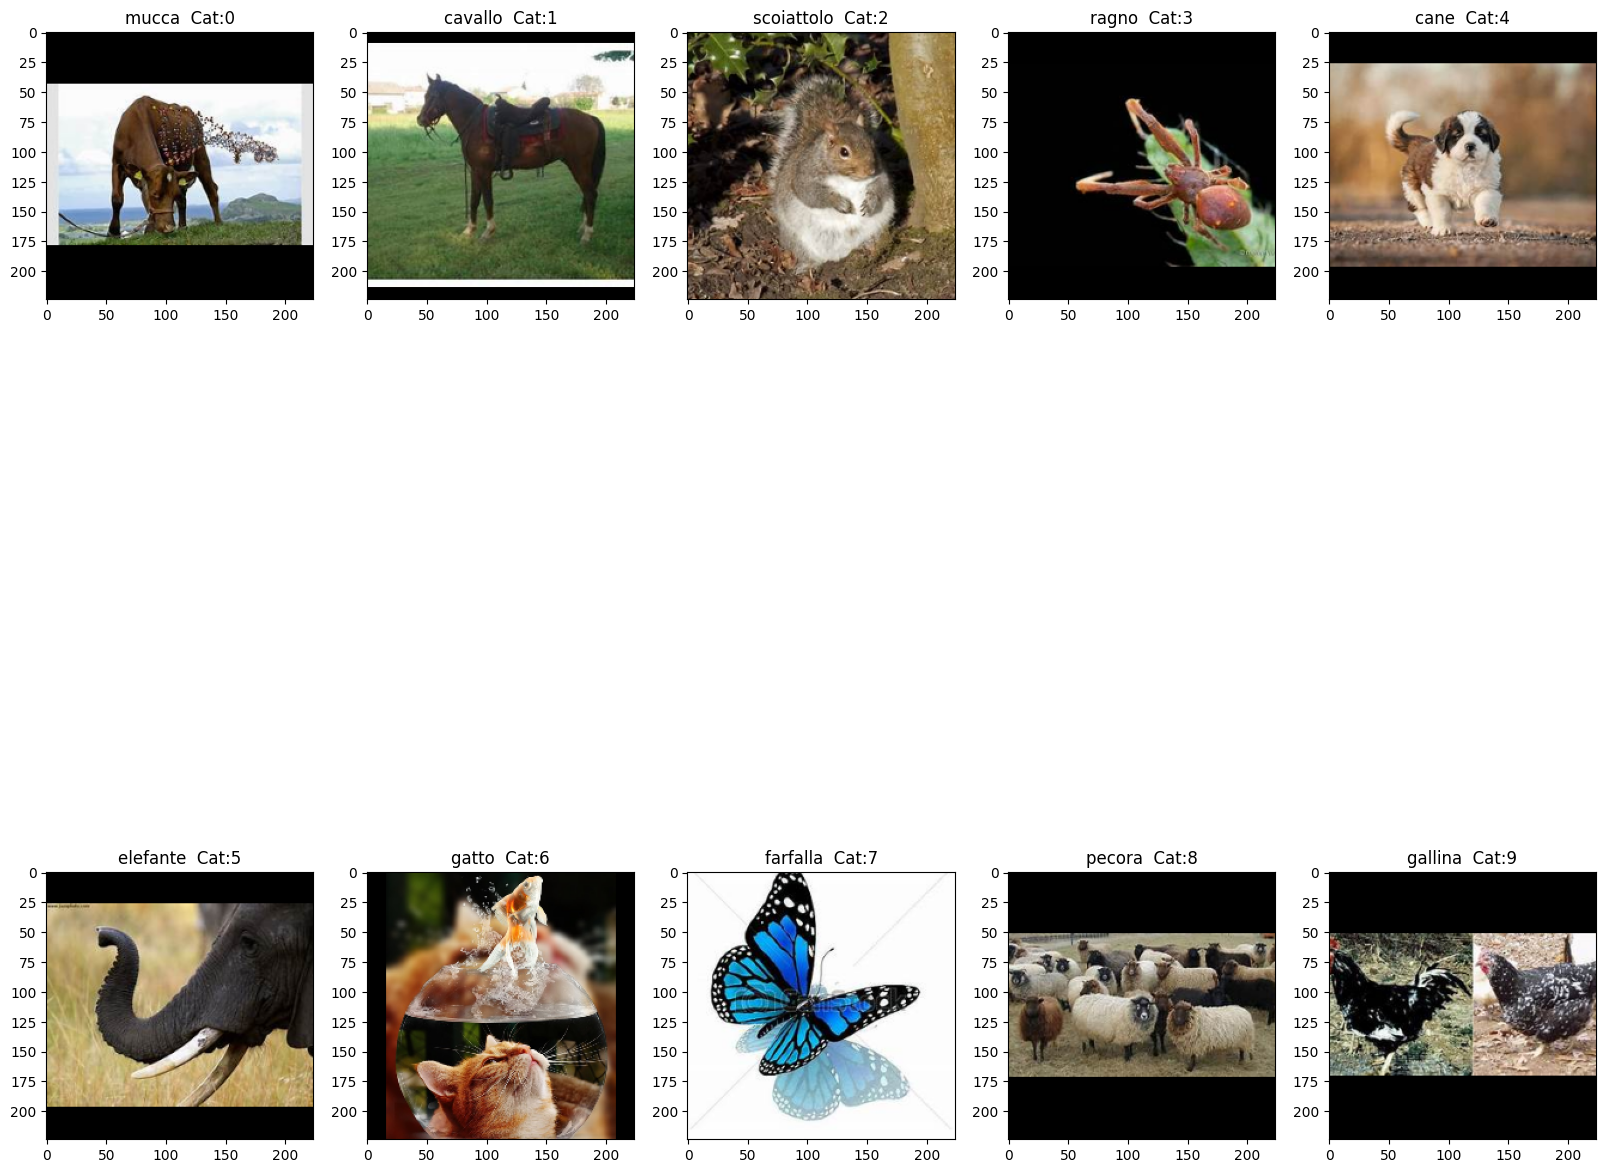

In [57]:
cols=5
fig, ax = plt.subplots(2,5, figsize=(20,20))
for i in range(10):
    path = train_df[train_df.category == i].values[1] #takes path in os of 1 value of figure of each category
#     print(path)
#     image = cv2.imread(path[0])  #     [i//cols, i%cols]
    ax[i//cols, i%cols].set_title(path[0].split('/')[-2] +' '+' Cat:'+ str(path[1])) # -2 is location of name of figure in path
    ax[i//cols, i%cols].imshow(images[train_df[train_df.filename == path[0]].index[0]])

<a id='step2.4'></a>
2.4. Re-Shuffling processed train data and converting to array 

In [58]:
data_num = len(y)
random_index = np.random.permutation(data_num)

x_shuffle = []
y_shuffle = []
for i in range(data_num):
    x_shuffle.append(images[random_index[i]])
    y_shuffle.append(y[random_index[i]])
    
x = np.array(x_shuffle) 
y = np.array(y_shuffle)

<a id='step2.5'></a>
2.5. Train val split, OneHotVectorizing categories, Input normalization

In [59]:
#train_test split
val_size = int(round(0.8*len(y)))
x_train = x[:val_size]
y_train = y[:val_size]
x_val = x[val_size:]
y_val = y[val_size:]

print('x_train Shape:', x_train.shape, '\t x_test Shape:',x_val.shape)
print('y_train Shape: ', y_train.shape, '\t y_test Shape:',y_val.shape)


y_train = to_categorical(y_train) 
y_val = to_categorical(y_val)

#dividing each intensity in array by 225 ( 225 is max intensity in RGB)
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255 
x_val /= 255

print('x_train Shape:', x_train.shape, '\t x_test Shape:',x_val.shape)
print('y_train Shape: ', y_train.shape, '\t y_test Shape:',y_val.shape)
print('image Shape:', x_train[0].shape)

x_train Shape: (4000, 224, 224, 3) 	 x_test Shape: (1000, 224, 224, 3)
y_train Shape:  (4000,) 	 y_test Shape: (1000,)
x_train Shape: (4000, 224, 224, 3) 	 x_test Shape: (1000, 224, 224, 3)
y_train Shape:  (4000, 10) 	 y_test Shape: (1000, 10)
image Shape: (224, 224, 3)


<a id='step2.6'></a>
2.6. Renaming Animals (helpful in viewing predictions)

In [60]:
animal_names = [] 
for i in range(10):
    path = train_df[train_df.category == i].values[1]
    if path[0].split('/')[-2] == 'scoiattolo':
        animal_names.append('squirrel')
    elif path[0].split('/')[-2] == 'cavallo':
        animal_names.append('horse')
    elif path[0].split('/')[-2] == 'farfalla':
        animal_names.append('butterfly')
    elif path[0].split('/')[-2] == 'mucca':
        animal_names.append('cow')
    elif path[0].split('/')[-2] == 'gatto':
        animal_names.append('cat')
    elif path[0].split('/')[-2] == 'pecora':
        animal_names.append('sheep')
    elif path[0].split('/')[-2] == 'gallina':
        animal_names.append('chicken')
    elif path[0].split('/')[-2] == 'elefante':
        animal_names.append('elephant')
    elif path[0].split('/')[-2] == 'ragno':
        animal_names.append('spider')
    elif path[0].split('/')[-2] == 'cane':
        animal_names.append('dog')

<a id='step2.7'></a>
2.7. ****Data Augmentation****

- rotation_range is a value in degrees (0-180), a range within which to randomly rotate pictures

- width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally

- rescale is a value by which we will multiply the data before any other processing. Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our models to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor.

- shear_range is for randomly applying shearing transformations

- zoom_range is for randomly zooming inside pictures

- horizontal_flip is for randomly flipping half of the images horizontally --relevant when there are no assumptions of horizontal assymetry (e.g. real-world pictures).

- fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

In [61]:
# ImageDataGenerator for data augmentation 

train_data_gen = ImageDataGenerator(rotation_range=45, 
                                    width_shift_range=0.1,
                                    height_shift_range=0.1, 
                                    horizontal_flip=True)
train_data_gen.fit(x_train) 

<a id='step2.8'></a>
2.8. Preprocessing test data

In [62]:
test_images = []
test_df = pd.DataFrame(columns=['filename'])
actual_pred=pd.DataFrame(columns=['Category'])
for i in range(10):
    test_df = test_df.append(df[df.category == i].iloc[500:502,:1])
    actual_pred=actual_pred.append(df[df.category == i].iloc[500:502,1:])

    test_df = test_df.reset_index(drop=True)
    actual_pred = actual_pred.reset_index(drop=True)
with tqdm(total=len(test_df)) as k:  
    for i, file_path in enumerate(test_df.filename.values):
        
        #color order is changed
        img = cv2.imread(file_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

        #converting images to square
        if(img.shape[0] > img.shape[1]):
            tile_size = (int(img.shape[1]*256/img.shape[0]),256)
        else:
            tile_size = (256, int(img.shape[0]*256/img.shape[1]))

        #centering the images
        img = centering_image(cv2.resize(img, dsize=tile_size))

        #output 224*224px 
        img = img[16:240, 16:240]
        test_images.append(img)
        k.update(1)
test_images = np.array(test_images).reshape(-1,224,224,3)

<ipython-input-62-59f92e96668f>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(df[df.category == i].iloc[500:502,:1])
<ipython-input-62-59f92e96668f>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  actual_pred=actual_pred.append(df[df.category == i].iloc[500:502,1:])
<ipython-input-62-59f92e96668f>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(df[df.category == i].iloc[500:502,:1])
<ipython-input-62-59f92e96668f>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  actual_pred=actual_pred.append(df[df.category == i].iloc[500:502,1:])
<ipython-input-62-59f92e96668f>:5: FutureWarning: Th

  0%|          | 0/20 [00:00<?, ?it/s]

In [65]:
# print(test_df.shape())

<a id='step3.1'></a>

3.1. ****Creating a Convolutional Neural Network using VGG16****

- Paper: [Very Deep Convolutional Networks for Large-Scale Image Recognition (ICLR 2015)](https://arxiv.org/abs/1409.1556)

- For transfer learning use cases, make sure to read the guide to transfer learning & fine-tuning.

- The default input size for this model is 224x224.

- Each Keras Application expects a specific kind of input preprocessing. For VGG19, call tf.keras.applications.vgg19.preprocess_input on your inputs before passing them to the model. vgg19.preprocess_input will convert the input images from RGB to BGR, then will zero-center each color channel with respect to the ImageNet dataset, without scaling.

In [74]:
rows,cols,channel = 224, 224, 3

epochs = 5
learning_rate = 0.001
decay_rate = learning_rate / epochs
momentum =0.9
sgd= optimizers.SGD(lr=learning_rate, momentum=momentum,
                      decay=decay_rate, nesterov=False)

base_model1 = applications.VGG16(weights='imagenet', include_top=False,
                                    input_shape=(224,224,3))
model1 = Sequential()
model1.add(Flatten(input_shape= base_model1.output_shape[1:]))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(10, activation='softmax'))

vgg16_model = Model(inputs=base_model1.input,
                        outputs=model1(base_model1.output))

vgg16_model.compile(loss='binary_crossentropy',
                        optimizer=sgd,metrics=['accuracy'])
# exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
vgg16_model.summary()



/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

<a id='step3.2'></a>

3.2. ****Creating a Convolutional Neural Network using ResNet50****

- Paper: [Deep Residual Learning for Image Recognition (CVPR 2015)](https://arxiv.org/abs/1512.03385)

- For transfer learning use cases, make sure to read the guide to transfer learning & fine-tuning.

- Each Keras Application expects a specific kind of input preprocessing. For ResNet, call tf.keras.applications.resnet.preprocess_input on your inputs before passing them to the model. resnet.preprocess_input will convert the input images from RGB to BGR, then will zero-center each color channel with respect to the ImageNet dataset, without scaling.



In [75]:
epochs = 5
learning_rate = 0.001
decay_rate = learning_rate / epochs
momentum =0.8
sgd= optimizers.SGD(lr=learning_rate, momentum=momentum,
                      decay=decay_rate, nesterov=False)

base_model2 =ResNet50(weights=None, include_top=False, input_shape=(224,224,3))
model2 = Sequential()
model2.add(Flatten(input_shape= base_model2.output_shape[1:]))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(10, activation='softmax'))

ResNet50_model = Model(inputs=base_model2.input,
                        outputs=model2(base_model2.output))
ResNet50_model.compile(loss='binary_crossentropy',
                        optimizer= sgd,
                          metrics=['accuracy'])
ResNet50_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

<a id='step3.3'></a>
3.3. Training Models
> ResNet50

In [ ]:
batch_size =32 #32 ,50#hyper parameters obtained by tuning
epochs = 5  #
neural_ntwk2= ResNet50_model.fit(train_data_gen.flow(x_train, y_train, batch_size=batch_size), steps_per_epoch= x_train.shape[0] // batch_size,
                    validation_data=(x_val, y_val),epochs=epochs,
                    callbacks=[ModelCheckpoint ('ResNet50transferlearning.model',
                               monitor='val_acc')])

Epoch 1/5
 44/125 [=========>....................] - ETA: 21:10 - loss: 0.4126 - accuracy: 0.1009

> VGG16

In [ ]:
batch_size =32 
epochs = 25  
neural_ntwk1 = vgg16_model.fit_generator(train_data_gen.flow(x_train, y_train,
                                        batch_size=batch_size),
                    steps_per_epoch= x_train.shape[0] // batch_size,
                    epochs=epochs,validation_data=(x_val, y_val),
                    callbacks=[ModelCheckpoint('VGG16-transferlearning.model',
                               monitor='val_acc')])


                                    

<a id='step3.4'></a>
3.4. Plotting loss and accuracy curves

ResNet50: Epochs=25, Train accuracy=0.90270,Val accuracy=0.90230


/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


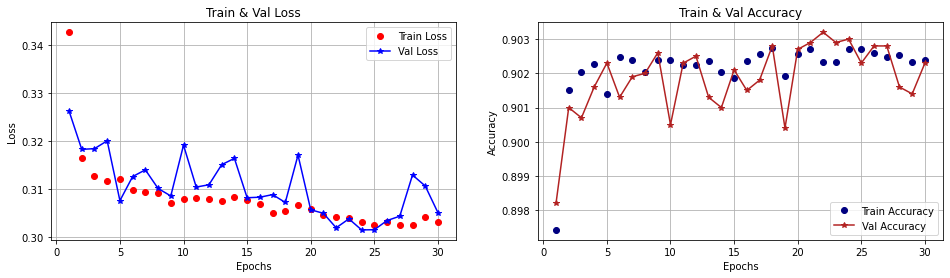

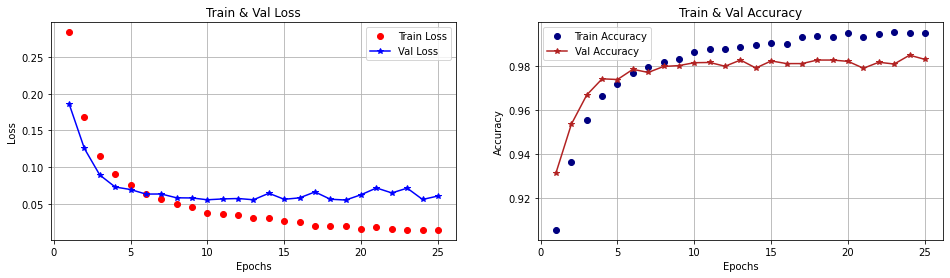

In [ ]:
# print("VGG16: Epochs={0:d}, Train accuracy={1:.5f}, Val accuracy={2:.5f}".format(epochs,neural_ntwk1.history['accuracy'][epochs-1],
#               neural_ntwk1.history['val_accuracy'][epochs-1]))
print("ResNet50: Epochs={0:d}, Train accuracy={1:.5f},Val accuracy={2:.5f}"
      .format(epochs,neural_ntwk2.history['accuracy'][epochs-1],
              neural_ntwk2.history['val_accuracy'][epochs-1]))

def show_plots(neural_ntwk):
    loss_vals = neural_ntwk['loss']
    val_loss_vals = neural_ntwk['val_loss']
    epochs = range(1, len(neural_ntwk['accuracy'])+1)
    
    f, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))
    
    ax[0].plot(epochs, loss_vals, color='R',marker='o',
               linestyle=' ', label='Train Loss')
    ax[0].plot(epochs, val_loss_vals, color='B',
               marker='*', label='Val Loss')
    ax[0].set(title='Train & Val Loss', xlabel='Epochs',ylabel='Loss')
    ax[0].legend(loc='best')
    ax[0].grid(True)
    
    # plot accuracies
    acc_vals = neural_ntwk['accuracy']
    val_acc_vals = neural_ntwk['val_accuracy']

    ax[1].plot(epochs, acc_vals, color='navy', marker='o',
               ls=' ', label='Train Accuracy')
    ax[1].plot(epochs, val_acc_vals, color='firebrick',
               marker='*', label='Val Accuracy')
    ax[1].set(title='Train & Val Accuracy',xlabel='Epochs',ylabel='Accuracy')
    ax[1].legend(loc='best')
    ax[1].grid(True)
    
    plt.show()
    plt.close()
    
    # delete locals from heap before exiting
    del loss_vals, val_loss_vals, epochs, acc_vals, val_acc_vals
# show_plots(neural_ntwk1.history)
show_plots(neural_ntwk2.history)
show_plots(neural_ntwk1.history)

Obtained Accuracy:
> VGG16: Epochs=25, Train accuracy=0.97040, Val accuracy=0.96210
> ResNet50: Epochs=25, Train accuracy=0.90222,Val accuracy=0.90170

<a id='step4'></a>
4. Predicting Categories for Test Data

In [ ]:
test_prediction1 = vgg16_model.predict(test_images)
test_prediction2 = ResNet50_model.predict(test_images)

<a id='step4.1'></a>
4.1. Viewing Predictions

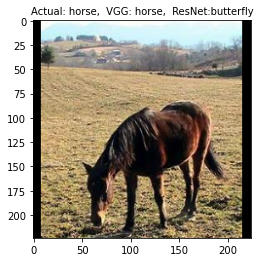

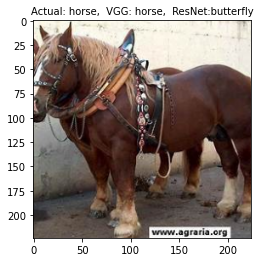

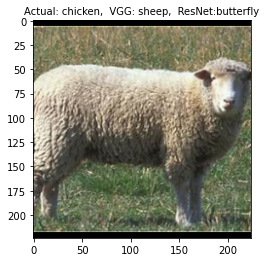

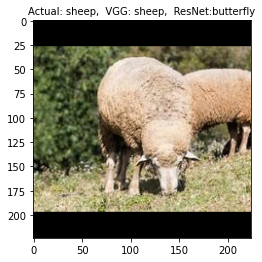

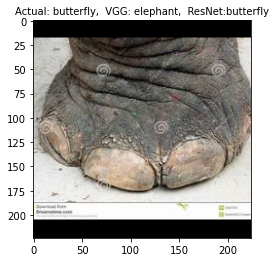

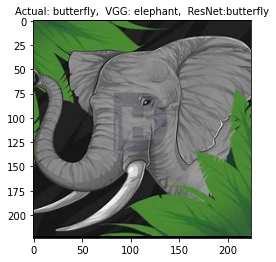

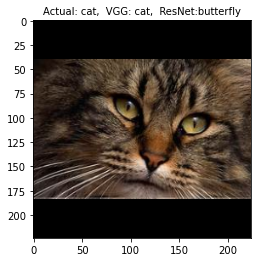

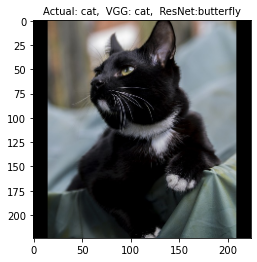

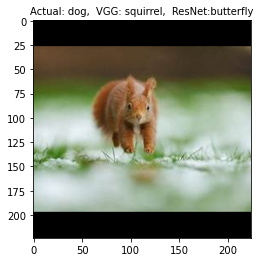

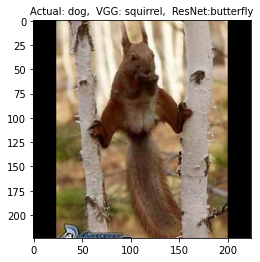

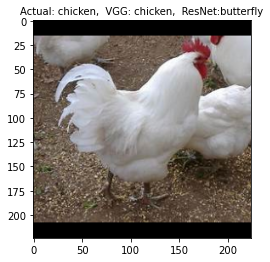

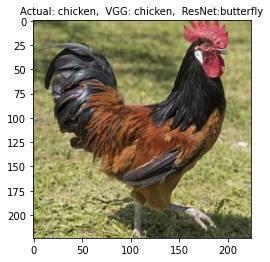

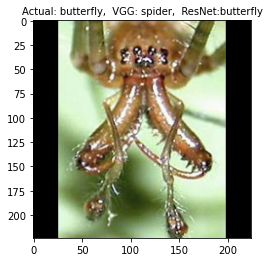

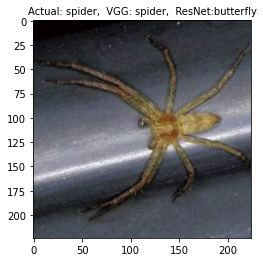

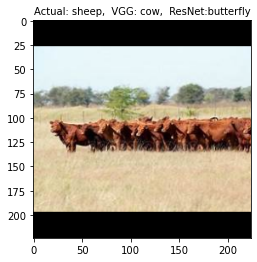

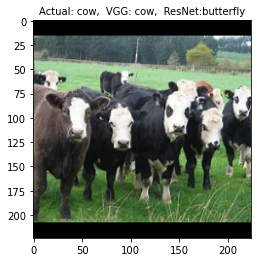

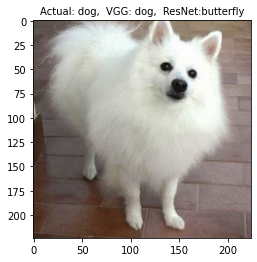

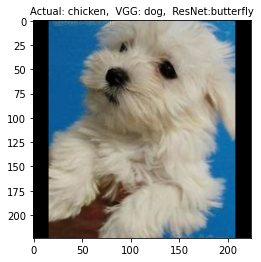

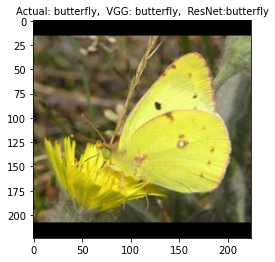

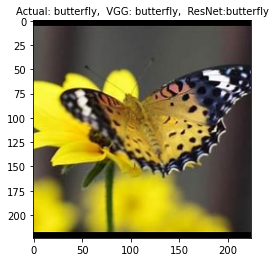

In [ ]:
actual_pred['category']=actual_pred['category'].astype('int')
for i in range(20):
    predict1= test_prediction1[i].argmax()
    predict2= test_prediction2[i].argmax()
    actual=actual_pred['category'][i]
    plt.imshow(test_images[i])
    plt.title("Actual: {1},  VGG: {0},  ResNet:{2}".format((animal_names[actual]),(animal_names[predict1]),(animal_names[predict2])), fontsize=10)
    plt.show()
